# CAPSTONE PROJECT

 The goal is to develop a model that can predict the score 'Concrete compressive strength' by taking relevent features

# Data Acquisition & Exploration
 
 

In [68]:
import numpy as np
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('compresive_strength_concrete.csv')
display(data.head())

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [69]:
display(data.describe())

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


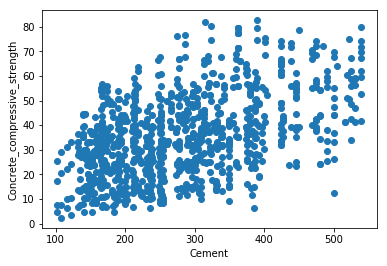

In [70]:
plt.scatter(data['Cement'],data['Concrete_compressive_strength'])
plt.xlabel('Cement')
plt.ylabel('Concrete_compressive_strength')
plt.show()


Scatter plot showing that Cement and Concrete compressive strength are highly correlated.
So,Cement will be the main feature to predict the strength

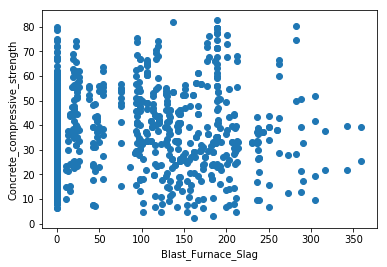

In [71]:
plt.scatter(data['Blast_Furnace_Slag'],data['Concrete_compressive_strength'])
plt.xlabel('Blast_Furnace_Slag')
plt.ylabel('Concrete_compressive_strength')
plt.show()


Blast furnace slag is one of the component in the preparation concrete.
If we see the scatter plot, range of 100 and 200  and 0 are having more datapoints. 

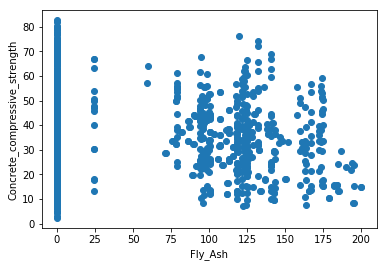

In [72]:
plt.scatter(data['Fly_Ash'],data['Concrete_compressive_strength'])
plt.xlabel('Fly_Ash')
plt.ylabel('Concrete_compressive_strength')
plt.show()


If concrete contains less amount of Fly ash then concrete will be no delay in hardening of concrete.If we see the scatter it also shows more datapoints at 0.  

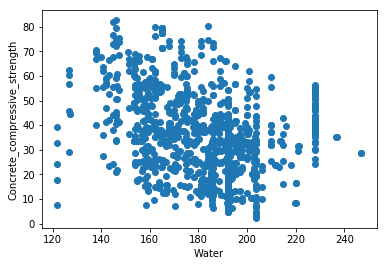

In [73]:
plt.scatter(data['Water'],data['Concrete_compressive_strength'])
plt.xlabel('Water')
plt.ylabel('Concrete_compressive_strength')
plt.show()


Water is one of the main ingredient in preparation of concrete.Efficient amount of water is needed for good strength of concrete.Scatter plot also tells the same point that water is highly important.

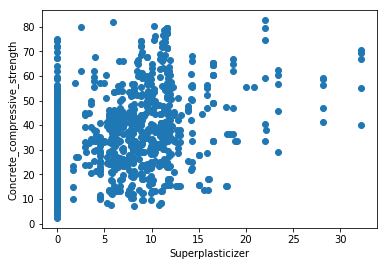

In [74]:
plt.scatter(data['Superplasticizer'],data['Concrete_compressive_strength'])
plt.xlabel('Superplasticizer')
plt.ylabel('Concrete_compressive_strength')
plt.show()


Superplasticizer is nothing but water reducers.They reduce water by 40%.
Sactterplot showing correlation so it also an important feature for predicting strength of concrete.

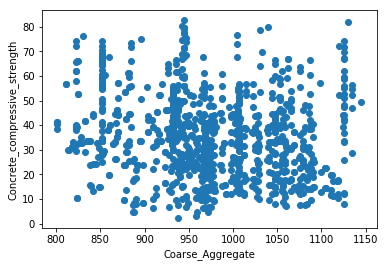

In [75]:
plt.scatter(data['Coarse_Aggregate'],data['Concrete_compressive_strength'])
plt.xlabel('Coarse_Aggregate')
plt.ylabel('Concrete_compressive_strength')
plt.show()


Coarse_Aggregate is highly correlated with compressive strength.So, it is most important feature

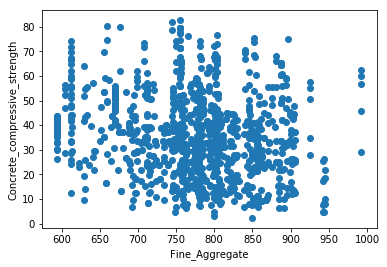

In [76]:
plt.scatter(data['Fine_Aggregate'],data['Concrete_compressive_strength'])
plt.xlabel('Fine_Aggregate')
plt.ylabel('Concrete_compressive_strength')
plt.show()


Scatterplot shows high correlation of Fine aggregate with concrete compressive strength.So,it is also one important main feature in predicting strength of concrete

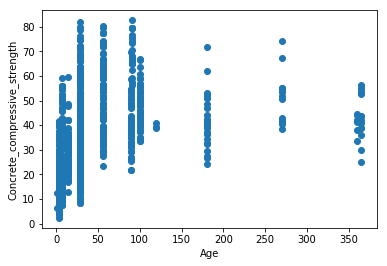

In [77]:
plt.scatter(data['Age'],data['Concrete_compressive_strength'])
plt.xlabel('Age')
plt.ylabel('Concrete_compressive_strength')
plt.show()


It describes a sheer intuition that the Age shows a striking factor in influencing strength of concrete.

In [78]:
target=data['Concrete_compressive_strength']
features=data.drop('Concrete_compressive_strength',axis=1)

(array([ 45., 133., 156., 181., 196., 112., 100.,  52.,  36.,  19.]),
 array([ 2.33 , 10.357, 18.384, 26.411, 34.438, 42.465, 50.492, 58.519,
        66.546, 74.573, 82.6  ]),
 <a list of 10 Patch objects>)

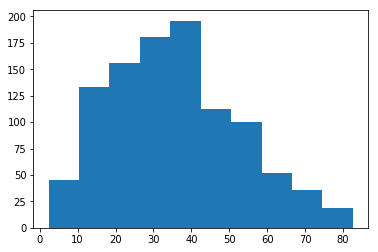

In [79]:
import matplotlib.pyplot as plt
plt.hist(target)

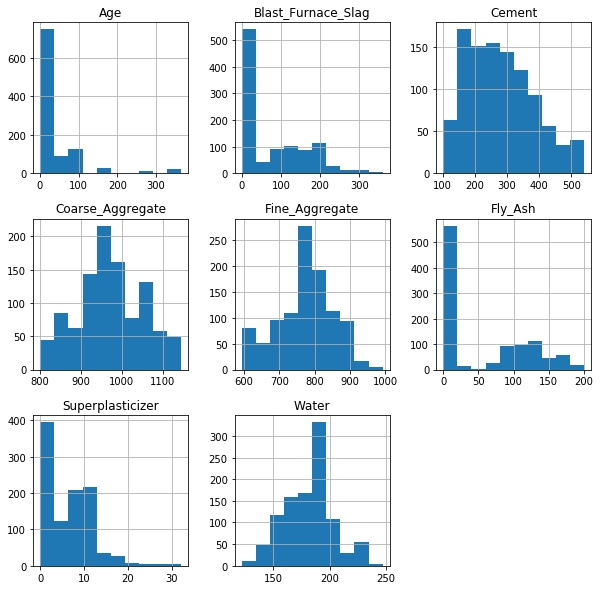

In [80]:
features.hist(figsize=(10,10))
plt.show()

# Data Preprocessing

In [81]:
# mark zero values as missing or NaN
print((data[['Cement','Fly_Ash','Water','Superplasticizer','Blast_Furnace_Slag',\
             'Coarse_Aggregate','Fine_Aggregate','Age','Concrete_compressive_strength']]==0).sum())

data[['Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate',\
      'Fine_Aggregate','Age','Concrete_compressive_strength']] =data[['Cement','Blast_Furnace_Slag','Fly_Ash','Water',\
        'Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age','Concrete_compressive_strength']] .replace(0, np.NaN)
# fill missing values with mean column values
data.fillna(data.mean(), inplace=True)
# count the number of NaN values in each column
print(data.isnull().sum())

Cement                             0
Fly_Ash                          566
Water                              0
Superplasticizer                 379
Blast_Furnace_Slag               471
Coarse_Aggregate                   0
Fine_Aggregate                     0
Age                                0
Concrete_compressive_strength      0
dtype: int64
Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64


In [82]:
data.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,136.158676,120.288793,162.0,2.500000,1040.0,676.0,28,79.99
1,540.0,136.158676,120.288793,162.0,2.500000,1055.0,676.0,28,61.89
2,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,270,40.27
3,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,365,41.05
4,198.6,132.400000,120.288793,192.0,9.816897,978.4,825.5,360,44.30


In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Cement','Fly_Ash','Water','Superplasticizer','Blast_Furnace_Slag',\
             'Coarse_Aggregate','Fine_Aggregate','Age']

features_log_minmax_transform = pd.DataFrame(data = features)
features_log_minmax_transform[numerical] = scaler.fit_transform(features[numerical])
display(features_log_minmax_transform.head(n = 5))
features=features_log_minmax_transform

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264


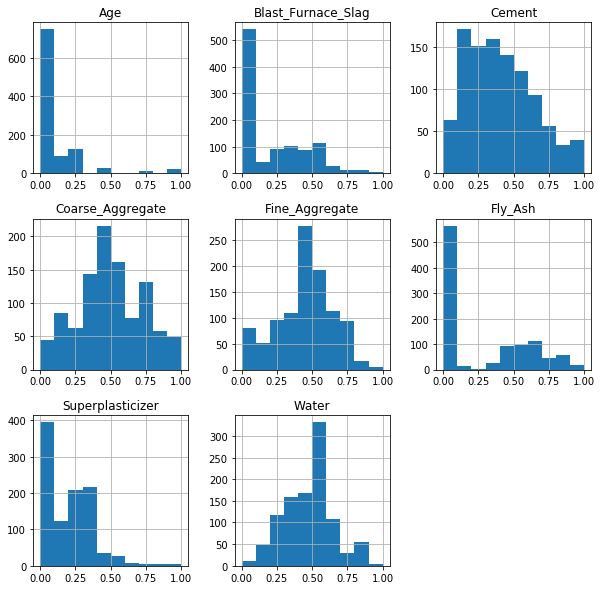

In [84]:
features.hist(figsize=(10,10))
plt.show()

# Shuffling and spliting the data

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=90)

print("Training and testing split was successful.")

Training and testing split was successful.


# Benchmark model

In [93]:
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import r2_score
reg=LinearRegression()
y_pred = reg.fit(X_train,y_train).predict(X_test)
print(r2_score(y_test,y_pred))

0.574066071464593


# Implementation

## using Support vector regressor

In [95]:
from sklearn.svm import SVR
reg=SVR()
y_pred = reg.fit(X_train,y_train).predict(X_test)
print(r2_score(y_test,y_pred))

0.29488396410973106


## using AdaBoostRegressor

In [96]:
from sklearn.ensemble import AdaBoostRegressor
reg=AdaBoostRegressor(random_state=2)
y_pred = reg.fit(X_train,y_train).predict(X_test)
print(r2_score(y_test,y_pred))

0.8003101856902188


## using Random forest regressor

In [109]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
y_pred = reg.fit(X_train,y_train).predict(X_test)
print(r2_score(y_test,y_pred))

0.9175442692550839


On comparing above 3 models random forest shows the best result that is r2_score of 0.91 means 91 % variance which is more than our bench mark model linear regressor (57.4% variance).

# Refinement

In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
regressor = RandomForestRegressor(random_state=3)
params = {'n_estimators':[50,100,150]}
scoring_fnc = make_scorer(r2_score)
grid = GridSearchCV(estimator=regressor,param_grid=params,scoring=scoring_fnc,cv=5)
grid = grid.fit(X_train, y_train)
grid_best = grid.best_estimator_

In [106]:
grid_pred = grid_best.predict(X_test)

In [107]:
grid_score = r2_score(y_test,grid_pred)
print grid_score

0.9248159294098636


After applying tuning parameters to GridSearchCV performance of model increased from 91 % varaince to 92.4% variance.
Therefore optimizing model has some increase in variance.Therefore Random forest regressor is the best model for predicting concrete compressive strength.